In [1]:
from PIL import Image

def split_image(image_path, split_width, split_height):
    # Open the image
    img = Image.open(image_path)

    # Calculate the number of splits
    img_width, img_height = img.size
    rows = img_height // split_height
    cols = img_width // split_width

    # Create a list to hold the split images
    split_images = []

    # Split the image and add to the list
    for i in range(rows):
        for j in range(cols):
            left = j * split_width
            top = i * split_height
            right = (j + 1) * split_width
            bottom = (i + 1) * split_height

            # Crop the image and append to the list
            split_images.append(img.crop((left, top, right, bottom)))

    return split_images


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

def split_npy(npy_path, split_width, split_height):
    # Open the image and convert it to a NumPy array
    img = np.load(npy_path)

    # Calculate the number of splits
    img_height, img_width = img.shape
    rows = img_height // split_height
    cols = img_width // split_width

    # Create a list to hold the split images
    split_images = []

    # Split the image and add to the list
    for i in range(rows):
        for j in range(cols):
            left = j * split_width
            top = i * split_height
            right = (j + 1) * split_width
            bottom = (i + 1) * split_height

            # Crop the image and append to the list
            split_images.append(img[top:bottom, left:right])

    return split_images

In [62]:
def split_all_images(name):
    for file in os.listdir(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/GT"):
        if file.endswith(".npy"):
            npy_file_path = os.path.join(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/GT", file)

            #create a new folder GT_Splitted
            if not os.path.exists(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/GT_Splitted"):
                os.makedirs(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/GT_Splitted")

            #split the image
            split_arrays = split_npy(npy_file_path, 1000,1000)

            #save the splitted images
            for i, array in enumerate(split_arrays):
                np.save(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/GT_Splitted/{file.replace('.npy', '')}_{i}.npy", array)

    for file in os.listdir(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/Image"):
        if file.endswith(".jpg"):
            png_file_path = os.path.join(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/Image", file)

            #create a new folder RGB_Splitted
            if not os.path.exists(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/Image_Splitted"):
                os.makedirs(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/Image_Splitted")

            #split the image
            split_images = split_image(png_file_path, 1000,1000)

            #save the splitted images
            for i, image in enumerate(split_images):
                image.save(f"../preprocessing/ITC_VD_Training_Testing_set/{name}/Image_Splitted/{file.replace('.jpg', '')}_{i}.png")


In [63]:
split_all_images("Training")
split_all_images("Testing")

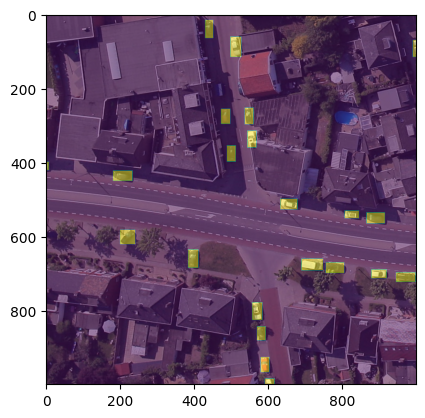

In [64]:
import matplotlib.pyplot as plt

image = np.array(Image.open("../preprocessing/ITC_VD_Training_Testing_set/Testing/Image_Splitted/00047_11.png"))
mask = np.load("../preprocessing/ITC_VD_Training_Testing_set/Testing/GT_Splitted/00047_11.npy")
plt.imshow(image)
plt.imshow(mask,alpha=0.5)
plt.plot();

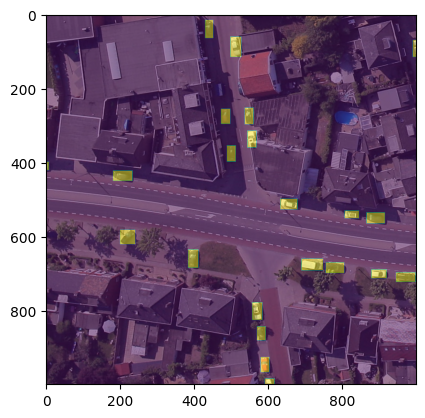

In [65]:
import matplotlib.pyplot as plt

image = np.array(Image.open("../preprocessing/ITC_VD_Training_Testing_set/Testing/Image_Splitted/00047_11.png"))
mask = np.load("../preprocessing/ITC_VD_Training_Testing_set/Testing/GT_Splitted/00047_11.npy")
plt.imshow(image)
plt.imshow(mask,alpha=0.5)
plt.plot();